In [61]:
import re

In [62]:
import pandas as pd

In [63]:
f = open("WhatsApp Chat with Python & Data Structures May 2023🚀.txt",'r',encoding='utf-8')

In [64]:
data = f.read()

In [65]:
print(type(data))

<class 'str'>


In [66]:
data

'19/07/23, 11:57 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n08/04/23, 20:03 - ~\u202fHimanshu created group "Python & Data Structures May 2023🚀"\n19/07/23, 11:57 - You joined using this group\'s invite link\n19/07/23, 17:02 - +91 6370 837 309 joined using this group\'s invite link\n19/07/23, 21:33 - +91 77374 91598: Does anyone have fundamentals of data engineering by Joe Reis and published by O\'REILLY  Media\n20/07/23, 08:33 - +91 90749 19189: <Media omitted>\n20/07/23, 08:33 - +91 90749 19189: here\n20/07/23, 08:59 - +91 77374 91598: Thanks man👍🏻\n20/07/23, 10:09 - +91 91562 19768: Thanks\n20/07/23, 10:14 - +91 79068 76803: Can anyone please Help me with python data structures from zero to advanced\n20/07/23, 10:15 - +92 326 9708100: I can\n20/07/23, 10:16 - +91 79068 76803: Please send me the complete course with video lectures\n20/07/23, 10:37 - +91 6375 620 337: Anyone can send me 

In [67]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [68]:
messages = re.split(pattern, data)[2:]
messages

['~\u202fHimanshu created group "Python & Data Structures May 2023🚀"\n',
 "You joined using this group's invite link\n",
 "+91 6370 837 309 joined using this group's invite link\n",
 "+91 77374 91598: Does anyone have fundamentals of data engineering by Joe Reis and published by O'REILLY  Media\n",
 '+91 90749 19189: <Media omitted>\n',
 '+91 90749 19189: here\n',
 '+91 77374 91598: Thanks man👍🏻\n',
 '+91 91562 19768: Thanks\n',
 '+91 79068 76803: Can anyone please Help me with python data structures from zero to advanced\n',
 '+92 326 9708100: I can\n',
 '+91 79068 76803: Please send me the complete course with video lectures\n',
 '+91 6375 620 337: Anyone can send me a complete Python syllabus image\n',
 '+91 86008 12138: <Media omitted>\n',
 '+91 90749 19189: https://god-level-python.notion.site/Python-Data-Structures-for-Data-Science-and-Machine-Learning-721c325bd3a9469f952b3317552e50a8?pvs=4\n',
 '+91 82202 76001: How long it took to master it\n',
 '+91 90749 19189: If you already

In [69]:
dates = re.findall(pattern, data)
dates

['19/07/23, 11:57 - ',
 '08/04/23, 20:03 - ',
 '19/07/23, 11:57 - ',
 '19/07/23, 17:02 - ',
 '19/07/23, 21:33 - ',
 '20/07/23, 08:33 - ',
 '20/07/23, 08:33 - ',
 '20/07/23, 08:59 - ',
 '20/07/23, 10:09 - ',
 '20/07/23, 10:14 - ',
 '20/07/23, 10:15 - ',
 '20/07/23, 10:16 - ',
 '20/07/23, 10:37 - ',
 '20/07/23, 10:40 - ',
 '20/07/23, 10:42 - ',
 '20/07/23, 10:42 - ',
 '20/07/23, 10:48 - ',
 '20/07/23, 11:54 - ',
 '20/07/23, 14:35 - ',
 '20/07/23, 18:28 - ',
 '20/07/23, 20:14 - ',
 '20/07/23, 20:15 - ',
 '20/07/23, 20:15 - ',
 '20/07/23, 20:40 - ',
 '20/07/23, 20:53 - ',
 '20/07/23, 20:54 - ',
 '20/07/23, 20:55 - ',
 '20/07/23, 20:55 - ',
 '20/07/23, 20:55 - ',
 '20/07/23, 20:55 - ',
 '20/07/23, 20:55 - ',
 '20/07/23, 20:55 - ',
 '20/07/23, 20:56 - ',
 '20/07/23, 20:56 - ',
 '20/07/23, 20:56 - ',
 '20/07/23, 21:01 - ',
 '20/07/23, 21:04 - ',
 '20/07/23, 21:31 - ',
 '20/07/23, 21:41 - ',
 '20/07/23, 21:41 - ',
 '20/07/23, 21:48 - ',
 '20/07/23, 22:11 - ',
 '20/07/23, 22:12 - ',
 '20/07/23,

In [70]:
# Find the minimum length between 'messages' and 'dates'
max_length = min(len(messages), len(dates))

# Trim both lists to the same length
messages = messages[:max_length]
dates = dates[:max_length]

# Now, 'messages' and 'dates' have the same length, and you can proceed to create the DataFrame.


In [71]:
# Check if 'messages' and 'dates' have the same length
if len(messages) != len(dates):
    raise ValueError("messages and dates lists must have the same length")

# Ensure that 'messages' and 'dates' have the same length
max_length = min(len(messages), len(dates))
messages = messages[:max_length]
dates = dates[:max_length]

# Create the DataFrame
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert 'message_date' type to datetime
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

# Extract the 'hour' from the 'date' column
df['hour'] = df['date'].dt.hour

def create_period(hour):
    if hour == 23:
        return str(hour) + "-" + '00'
    elif hour == 0:
        return '00' + "-" + str(hour + 1)
    else:
        return str(hour) + "-" + str(hour + 1)

# Check the column name to ensure it matches your DataFrame.
if 'hour' in df.columns:
    df['period'] = df['hour'].apply(create_period)


In [72]:
df.head(10)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,period
0,2023-07-19 11:57:00,group_notification,"~ Himanshu created group ""Python & Data Struct...",2023-07-19,2023,7,July,19,Wednesday,11,11-12
1,2023-04-08 20:03:00,group_notification,You joined using this group's invite link\n,2023-04-08,2023,4,April,8,Saturday,20,20-21
2,2023-07-19 11:57:00,group_notification,+91 6370 837 309 joined using this group's inv...,2023-07-19,2023,7,July,19,Wednesday,11,11-12
3,2023-07-19 17:02:00,+91 77374 91598,Does anyone have fundamentals of data engineer...,2023-07-19,2023,7,July,19,Wednesday,17,17-18
4,2023-07-19 21:33:00,+91 90749 19189,<Media omitted>\n,2023-07-19,2023,7,July,19,Wednesday,21,21-22
5,2023-07-20 08:33:00,+91 90749 19189,here\n,2023-07-20,2023,7,July,20,Thursday,8,8-9
6,2023-07-20 08:33:00,+91 77374 91598,Thanks man👍🏻\n,2023-07-20,2023,7,July,20,Thursday,8,8-9
7,2023-07-20 08:59:00,+91 91562 19768,Thanks\n,2023-07-20,2023,7,July,20,Thursday,8,8-9
8,2023-07-20 10:09:00,+91 79068 76803,Can anyone please Help me with python data str...,2023-07-20,2023,7,July,20,Thursday,10,10-11
9,2023-07-20 10:14:00,+92 326 9708100,I can\n,2023-07-20,2023,7,July,20,Thursday,10,10-11


In [73]:
df.shape

(348, 11)

In [74]:
df.head(10)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,period
0,2023-07-19 11:57:00,group_notification,"~ Himanshu created group ""Python & Data Struct...",2023-07-19,2023,7,July,19,Wednesday,11,11-12
1,2023-04-08 20:03:00,group_notification,You joined using this group's invite link\n,2023-04-08,2023,4,April,8,Saturday,20,20-21
2,2023-07-19 11:57:00,group_notification,+91 6370 837 309 joined using this group's inv...,2023-07-19,2023,7,July,19,Wednesday,11,11-12
3,2023-07-19 17:02:00,+91 77374 91598,Does anyone have fundamentals of data engineer...,2023-07-19,2023,7,July,19,Wednesday,17,17-18
4,2023-07-19 21:33:00,+91 90749 19189,<Media omitted>\n,2023-07-19,2023,7,July,19,Wednesday,21,21-22
5,2023-07-20 08:33:00,+91 90749 19189,here\n,2023-07-20,2023,7,July,20,Thursday,8,8-9
6,2023-07-20 08:33:00,+91 77374 91598,Thanks man👍🏻\n,2023-07-20,2023,7,July,20,Thursday,8,8-9
7,2023-07-20 08:59:00,+91 91562 19768,Thanks\n,2023-07-20,2023,7,July,20,Thursday,8,8-9
8,2023-07-20 10:09:00,+91 79068 76803,Can anyone please Help me with python data str...,2023-07-20,2023,7,July,20,Thursday,10,10-11
9,2023-07-20 10:14:00,+92 326 9708100,I can\n,2023-07-20,2023,7,July,20,Thursday,10,10-11


In [75]:
df[df['user']=='Rudra Gec'].shape[1]

11

In [76]:
words=[]
for i in df['message']:
    words.extend(i.split())

In [77]:
len(words)

4260

In [78]:
pip install urlextract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
from urlextract import URLExtract

extractor = URLExtract()
text = "Like Stackoverflow.com"  # Combine your list of strings into a single string
urls = extractor.find_urls(text)
print(urls)

['Stackoverflow.com']


In [80]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [81]:
links

['https://god-level-python.notion.site/Python-Data-Structures-for-Data-Science-and-Machine-Learning-721c325bd3a9469f952b3317552e50a8?pvs=4',
 'https://upvir.al/ref/64b8d2dbd7a21M',
 'https://youtube.com/shorts/7BC3QtbRp9M?feature=share',
 'https://t.me/+XP_7OAKjmCgzN2Jl',
 'https://t.me/+XP_7OAKjmCgzN2Jl',
 'https://t.me/+XP_7OAKjmCgzN2Jl',
 'https://chat.whatsapp.com/BpEkN5Kf1Cg4g6SVi1XLMn',
 'https://chat.whatsapp.com/GmWd1h8ncHt1I31JULrSnu',
 'https://www.linkedin.com/posts/tanmay--chakraborty_aws-machine-learning-speciality-certificate-activity-7088833394540707840-rkSa?utm_source=share&utm_medium=member_android',
 'https://mega.nz/folder/tqIyBR6Z#UvNMH18WVzS4wfDhu__YIw',
 'https://t.me/+XP_7OAKjmCgzN2Jl',
 'https://youtu.be/JwRXGfpO46g',
 'https://youtube.com/playlist?list=PLIt1KXrR0fWjeuGs4Ggf1qD6WE9gAxuoN',
 'https://chat.whatsapp.com/BpEkN5Kf1Cg4g6SVi1XLMn',
 'https://chat.whatsapp.com/GmWd1h8ncHt1I31JULrSnu',
 'https://sololearn.onelink.me/MfgO/l9i7z8o6',
 'https://youtube.com/

In [82]:
len(links)

87

In [83]:
x = df['user'].value_counts().head()

In [84]:
import matplotlib.pyplot as plt

In [85]:
name = x.index
count = x.values

<BarContainer object of 5 artists>

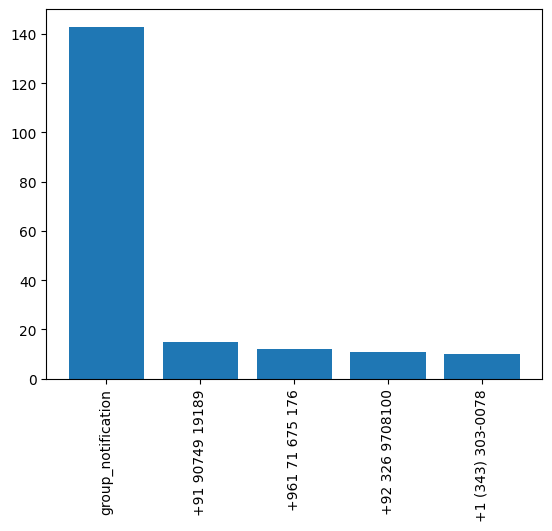

In [88]:
plt.xticks(rotation='vertical')
plt.bar(name,count)

In [89]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'precent'})

,name,precent
0,group_notification,41.09
1,+91 90749 19189,4.31
2,+961 71 675 176,3.45
3,+92 326 9708100,3.16
4,+1 (343) 303-0078,2.87
...,...,...
74,+1 (617) 543-3436,0.29
75,+91 94280 70187,0.29
76,+91 72071 57885,0.29
77,+971 50 470 9187,0.29


In [90]:
# remove group notification
# remove media_omitted
# remove stop words

In [91]:
temp = df[df['user']=='group_notification']
temp = temp[temp['message']!='<media_omitted>\n']

In [92]:
f = open('stop_hinglish.txt','r')
stopwords = f.read()
print(stopwords)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [93]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.extend(message.split())
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,this,903
1,joined,865
2,using,865
3,group's,865
4,invite,865
5,link,865
6,+91,623
7,to,116
8,changed,106
9,+1,77


In [94]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [95]:
import emoji
import re
import pandas as pd

emojis = []

for message in df['message']:
    # Convert emojis to text
    message_with_emojis = emoji.demojize(message)

    # Use regular expressions to find emojis
    emoji_list = re.findall(r':\w+:', message_with_emojis)

    # Add found emojis to the list
    emojis.extend(emoji_list)

# Convert emoji text back to emoji characters
emojis_df = [emoji.emojize(emoji_text) for emoji_text in emojis]

In [96]:
# Create a DataFrame with the emojis with count
pd.DataFrame(Counter(emojis_df).most_common(len(Counter(emojis_df))))


,0,1
0,⭕,15
1,📌,14
2,📍,9
3,🔰,6
4,👇,6
5,🚀,4
6,🙏,4
7,➕,3
8,👍🏻,2
9,🎉,2


In [97]:
df['month_num'] = df['date'].dt.month

In [98]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,period
0,2023-07-19 11:57:00,group_notification,"~ Himanshu created group ""Python & Data Struct...",2023-07-19,2023,7,July,19,Wednesday,11,11-12
1,2023-04-08 20:03:00,group_notification,You joined using this group's invite link\n,2023-04-08,2023,4,April,8,Saturday,20,20-21
2,2023-07-19 11:57:00,group_notification,+91 6370 837 309 joined using this group's inv...,2023-07-19,2023,7,July,19,Wednesday,11,11-12
3,2023-07-19 17:02:00,+91 77374 91598,Does anyone have fundamentals of data engineer...,2023-07-19,2023,7,July,19,Wednesday,17,17-18
4,2023-07-19 21:33:00,+91 90749 19189,<Media omitted>\n,2023-07-19,2023,7,July,19,Wednesday,21,21-22
...,...,...,...,...,...,...,...,...,...,...,...
343,2023-11-06 03:56:00,+91 99845 53587,hello everyone good evening I am looking job f...,2023-11-06,2023,11,November,6,Monday,3,3-4
344,2023-11-06 19:52:00,+91 99845 53587,<Media omitted>\n,2023-11-06,2023,11,November,6,Monday,19,19-20
345,2023-11-06 19:52:00,+91 6387 163 461,*Join our Official WhatsApp Group to learn abo...,2023-11-06,2023,11,November,6,Monday,19,19-20
346,2023-11-07 13:28:00,group_notification,+1 (585) 397-9141 changed to +91 75691 58015\n,2023-11-07,2023,11,November,7,Tuesday,13,13-14


In [99]:
timeline = df.groupby(['year','month']).count()['message'].reset_index()

In [100]:
timeline

,year,month,message
0,2023,April,1
1,2023,August,124
2,2023,July,109
3,2023,November,9
4,2023,October,61
5,2023,September,44


In [101]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [102]:
timeline['time'] = time

In [103]:
timeline

,year,month,message,time
0,2023,April,1,April-2023
1,2023,August,124,August-2023
2,2023,July,109,July-2023
3,2023,November,9,November-2023
4,2023,October,61,October-2023
5,2023,September,44,September-2023


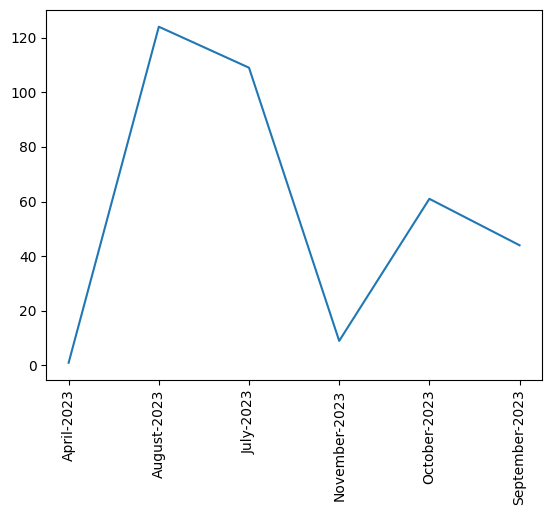

In [104]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [105]:
df['daily'] = df['date'].dt.date

In [106]:
daily_timeline = df.groupby('daily').count()['message'].reset_index()

In [107]:
daily_timeline

,daily,message
0,2023-04-08,1
1,2023-07-19,4
2,2023-07-20,40
3,2023-07-21,7
4,2023-07-22,7
...,...,...
73,2023-11-01,1
74,2023-11-02,1
75,2023-11-04,2
76,2023-11-06,3


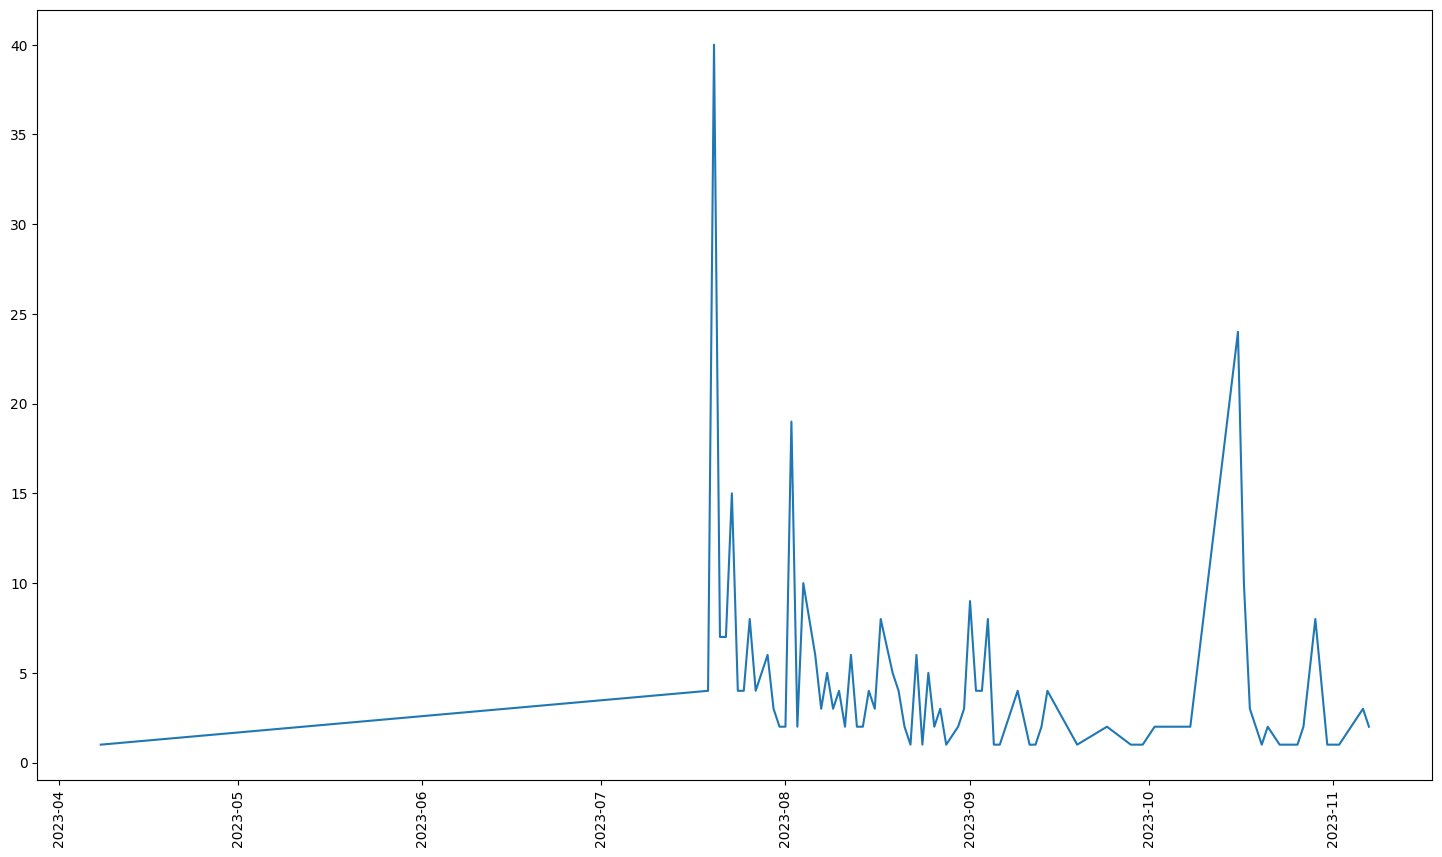

In [108]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['daily'],daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# Why cant we do sentiment analysis on the message because
# for that we need predefined text_message but 
# whatsapp has privacy issue hence we dont have such message
# and thus we cannot apply Sentiment Analysis.

In [110]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,period,daily
0,2023-07-19 11:57:00,group_notification,"~ Himanshu created group ""Python & Data Struct...",2023-07-19,2023,7,July,19,Wednesday,11,11-12,2023-07-19
1,2023-04-08 20:03:00,group_notification,You joined using this group's invite link\n,2023-04-08,2023,4,April,8,Saturday,20,20-21,2023-04-08
2,2023-07-19 11:57:00,group_notification,+91 6370 837 309 joined using this group's inv...,2023-07-19,2023,7,July,19,Wednesday,11,11-12,2023-07-19
3,2023-07-19 17:02:00,+91 77374 91598,Does anyone have fundamentals of data engineer...,2023-07-19,2023,7,July,19,Wednesday,17,17-18,2023-07-19
4,2023-07-19 21:33:00,+91 90749 19189,<Media omitted>\n,2023-07-19,2023,7,July,19,Wednesday,21,21-22,2023-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2023-11-06 03:56:00,+91 99845 53587,hello everyone good evening I am looking job f...,2023-11-06,2023,11,November,6,Monday,3,3-4,2023-11-06
344,2023-11-06 19:52:00,+91 99845 53587,<Media omitted>\n,2023-11-06,2023,11,November,6,Monday,19,19-20,2023-11-06
345,2023-11-06 19:52:00,+91 6387 163 461,*Join our Official WhatsApp Group to learn abo...,2023-11-06,2023,11,November,6,Monday,19,19-20,2023-11-06
346,2023-11-07 13:28:00,group_notification,+1 (585) 397-9141 changed to +91 75691 58015\n,2023-11-07,2023,11,November,7,Tuesday,13,13-14,2023-11-07


In [111]:
# Analysing Conversations Trends in Messages

In [112]:
# Apply topic modeling techniques like Latent Dirichlet Allocation (LDA)
# or Non-negative Matrix Factorization (NMF) 
# to discover recurring topics in the chat.

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [114]:
vec = CountVectorizer()
dtm = vec.fit_transform(df)

In [115]:
# Apply LDA
lda = LatentDirichletAllocation(n_components=5,random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [116]:
# extract Top Keywords from the chat Data

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(df)

# Extract top keywords
top_keywords = tfidf_vectorizer.get_feature_names_out()


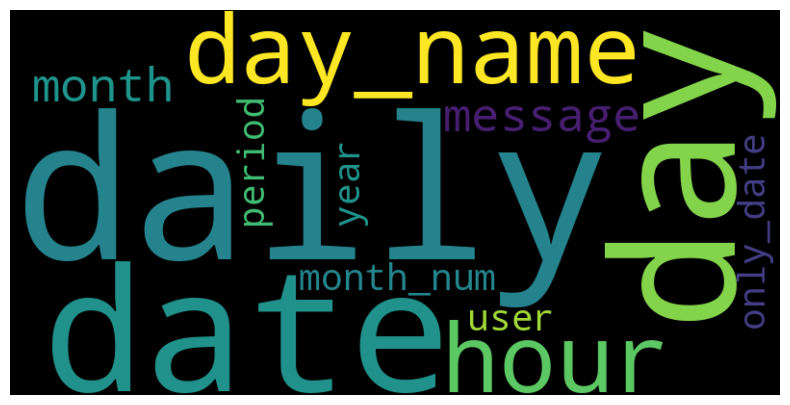

In [119]:
import matplotlib.pyplot as plt

# Create a word cloud for top keywords
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(top_keywords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Plot term frequency over time
# Use datetime information if available in the chat data
